In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 8]

import warnings
warnings.filterwarnings("ignore")

# ML Libraries
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [5]:
health=pd.read_csv("~/OneDrive/Desktop/SLR/class notes/healthinsurance.csv")

In [6]:
health.shape

(15000, 13)

In [98]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [7]:
health.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [8]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [101]:
health['smoker']=health.smoker.astype('object')
health['diabetes']=health.diabetes.astype('object')
health['regular_ex']=health.regular_ex.astype('object')


In [ ]:
health.info()

In [103]:
health.select_dtypes(include=np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

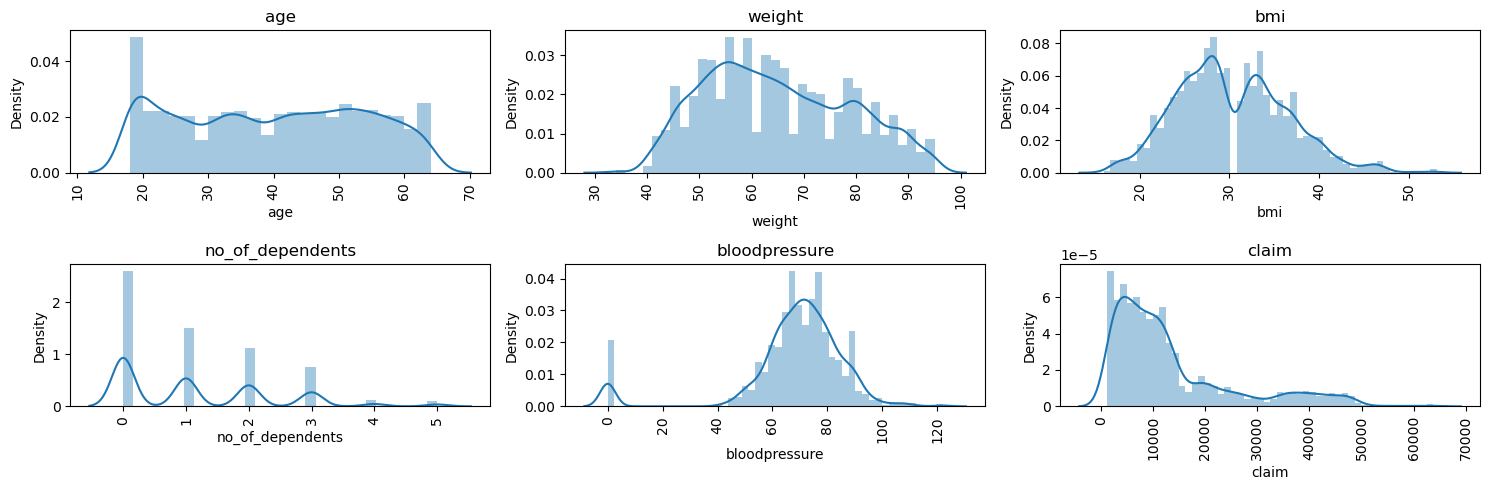

In [104]:
cols=['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim']
plt.figure(figsize=(15,5))
a=2
b=3
c=1
for i in cols:
    plt.subplot(a,b,c)
    sns.distplot(health.loc[:, i].dropna())
    c+=1
    plt.title(i)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

In [105]:
health.select_dtypes(include=object).columns

Index(['sex', 'hereditary_diseases', 'smoker', 'city', 'diabetes',
       'regular_ex', 'job_title'],
      dtype='object')

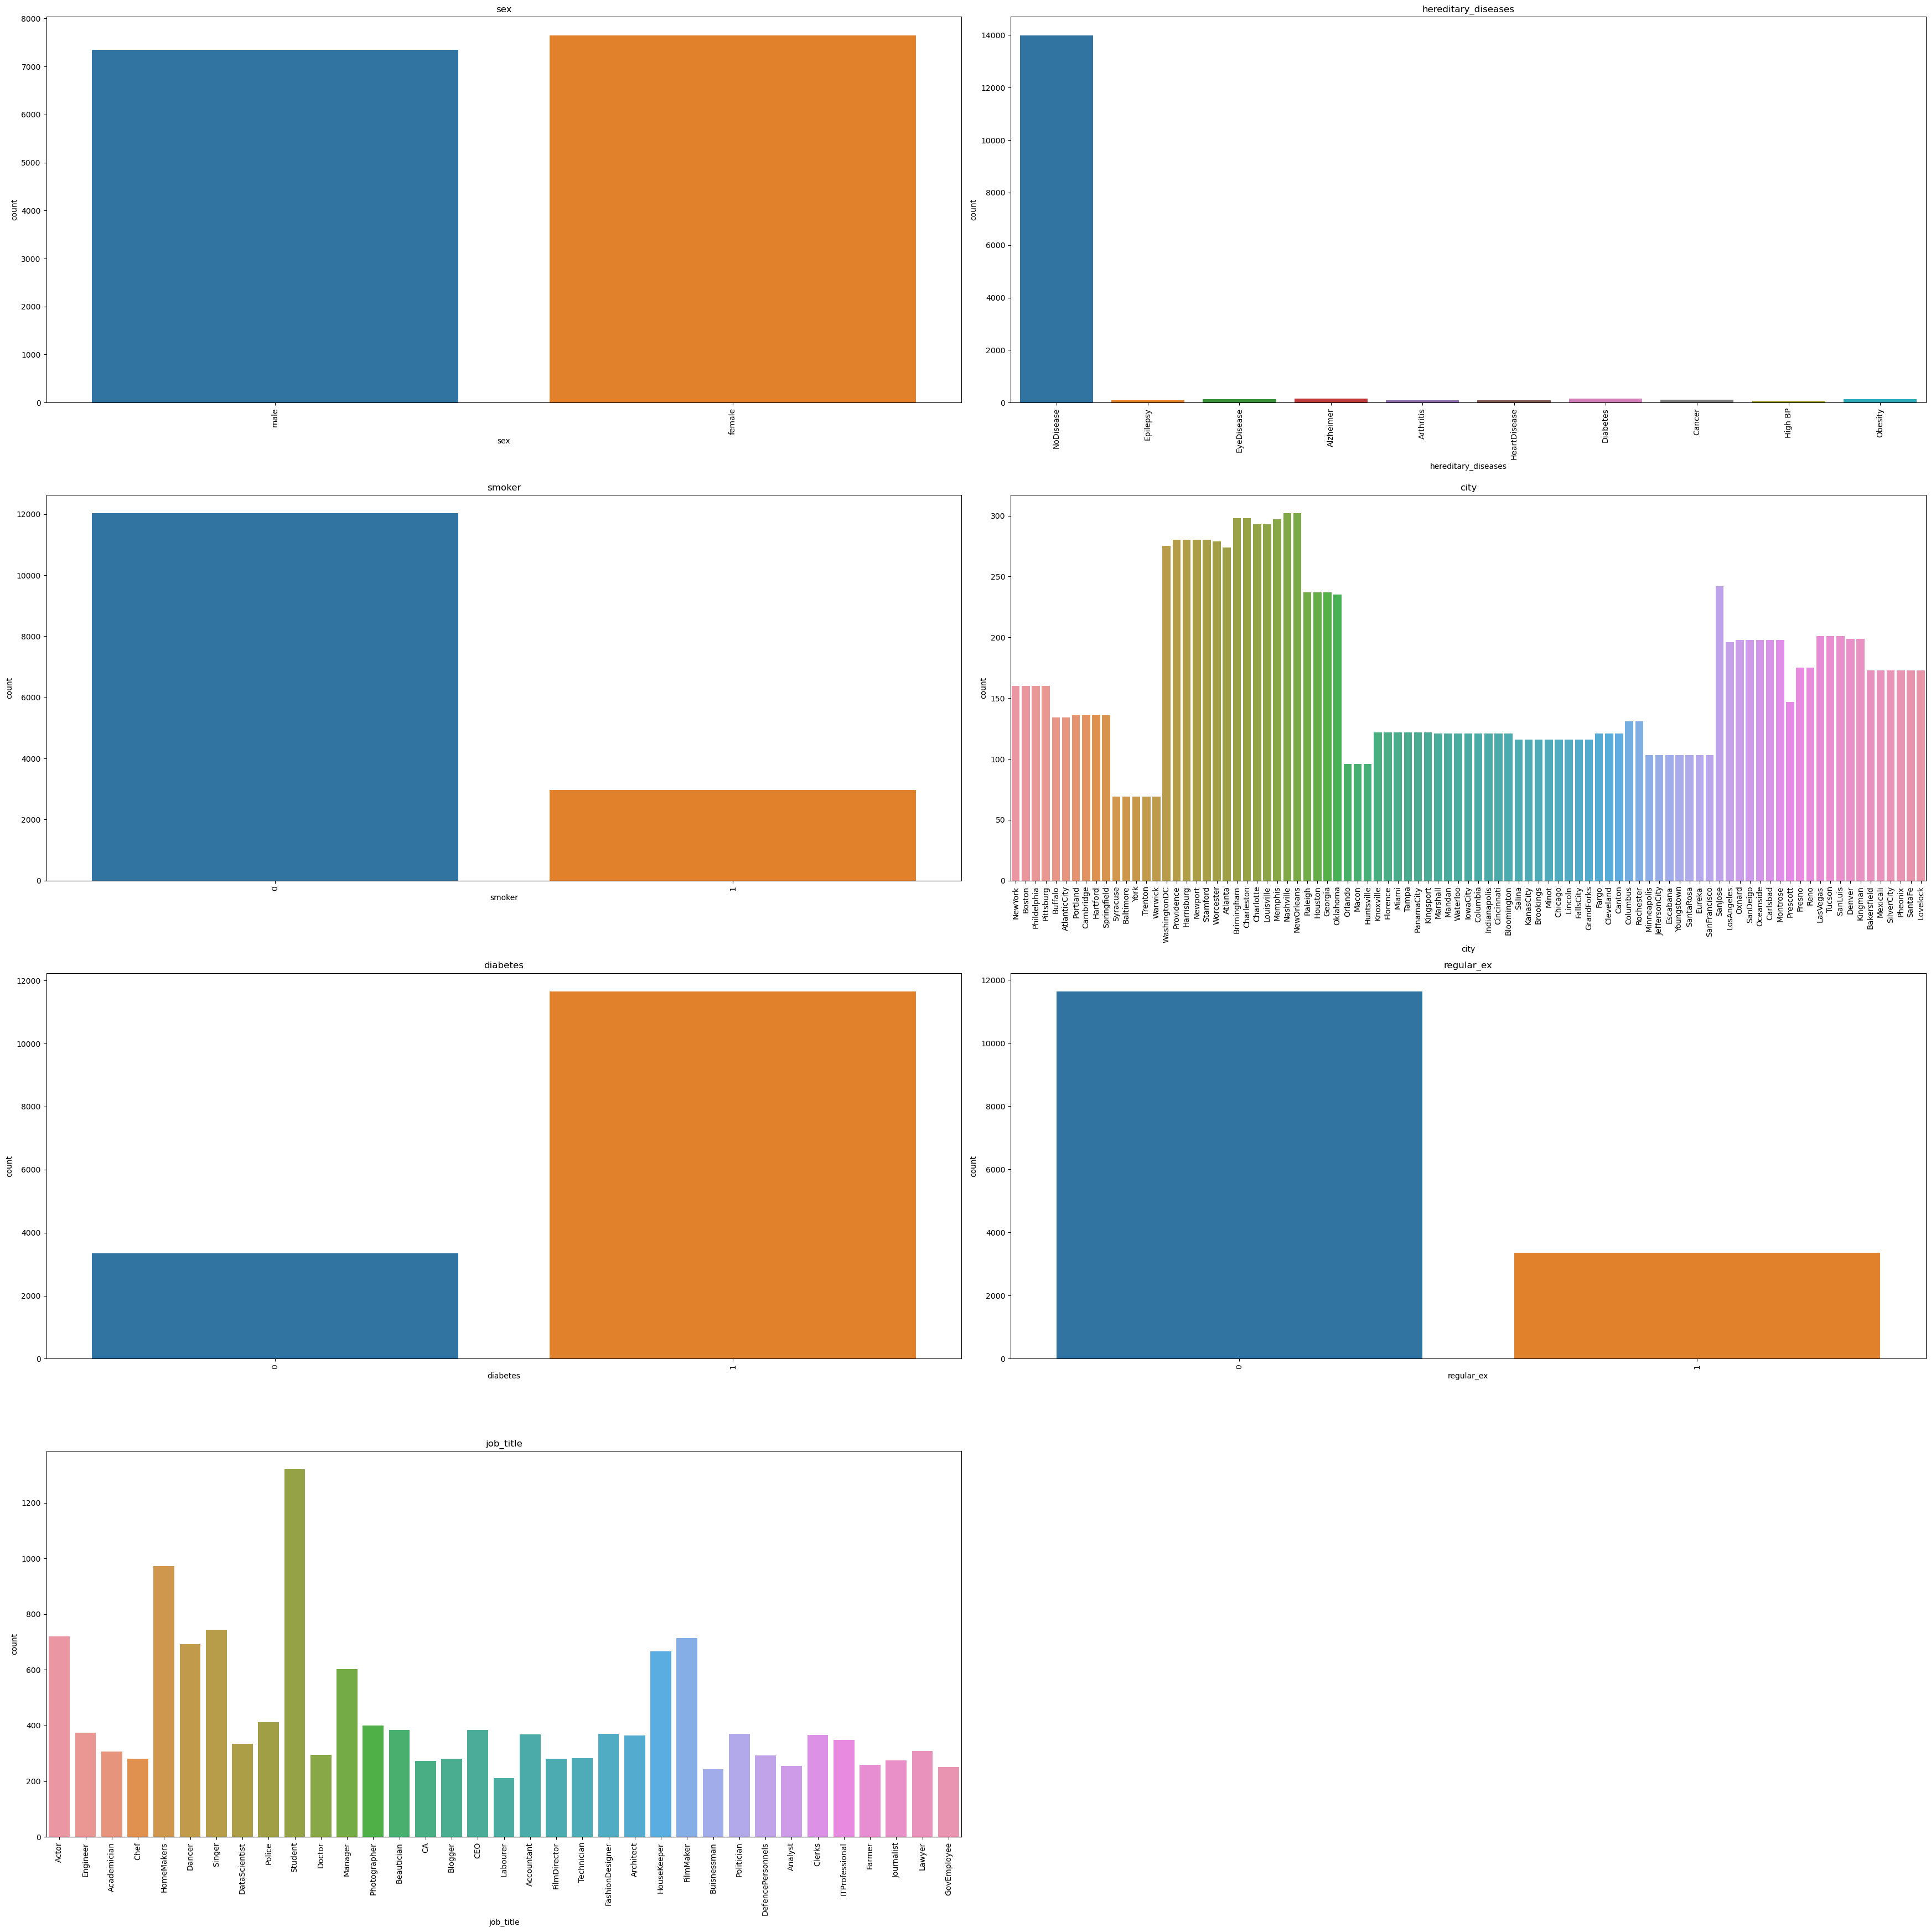

In [106]:
cat_col=['sex', 'hereditary_diseases', 'smoker', 'city', 'diabetes',
       'regular_ex', 'job_title']
plt.rcParams['figure.figsize'] = [35,35]

a = 4
b = 2
c = 1

for i in cat_col:
    plt.subplot(a, b, c)
    sns.countplot(health[i])
    plt.xticks(rotation = 90)
    plt.title(i)
    c = c+1
plt.tight_layout()
plt.show()


In [107]:
health.isnull().sum()[health.isnull().sum()!=0]

age    396
bmi    956
dtype: int64

In [108]:
health.sex.unique()

array(['male', 'female'], dtype=object)

In [109]:
health.loc[health.age.isnull()!=0,'sex']

76       female
82       female
105      female
106      female
110      female
          ...  
14769    female
14882    female
14943      male
14962      male
14969      male
Name: sex, Length: 396, dtype: object

In [110]:
health.loc[health.age.isnull()!=0,'sex'].unique()

array(['female', 'male'], dtype=object)

In [111]:
health.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

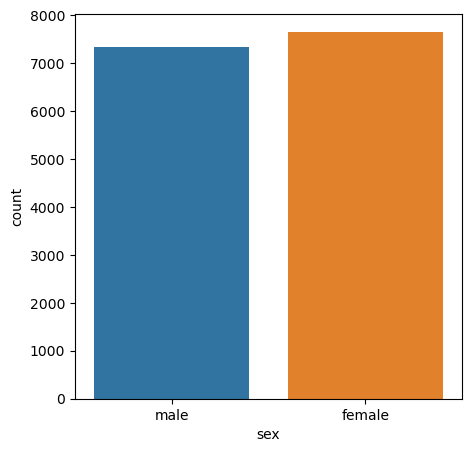

In [112]:
plt.figure(figsize=(5,5))
sns.countplot(health.sex)

<AxesSubplot:ylabel='sex'>

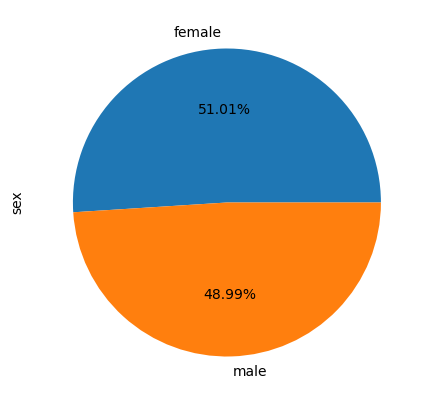

In [113]:
plt.figure(figsize=(5,5))
health.sex.value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')

In [114]:
health.groupby('age')['sex'].describe()

,count,unique,top,freq
age,,,,
18.0,768,2,female,423
19.0,653,2,female,347
20.0,279,2,male,151
21.0,368,2,female,198
22.0,333,2,male,171
23.0,312,2,female,163
24.0,326,2,female,187
25.0,272,2,male,139
26.0,278,2,female,140


In [115]:
health.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,7387.0,39.361040,14.111861,18.0,26.0,40.0,51.5,64.0
male,7217.0,39.738395,13.915518,18.0,27.0,40.0,52.0,64.0


In [116]:
health.groupby('sex')['age'].median()

sex
female    40.0
male      40.0
Name: age, dtype: float64

In [117]:
health.loc[health.age.isnull(),'age']=40.0

In [118]:
health.loc[health.bmi.isnull(),'bmi']=health.bmi.median()

In [119]:
health.loc[health.age.isnull()!=0,'sex']

Series([], Name: sex, dtype: object)

In [120]:
health.bmi

0        24.3
1        22.6
2        17.8
3        36.4
4        20.6
         ... 
14995    28.3
14996    29.6
14997    33.3
14998    36.7
14999    26.4
Name: bmi, Length: 15000, dtype: float64

In [121]:

health.loc[(health.sex=="female") & (health.bmi.isnull()), "bmi"] = 28.8
health.loc[(health.sex=="male") & (health.bmi.isnull()), "bmi"] = 29.9

In [122]:
health.bmi

0        24.3
1        22.6
2        17.8
3        36.4
4        20.6
         ... 
14995    28.3
14996    29.6
14997    33.3
14998    36.7
14999    26.4
Name: bmi, Length: 15000, dtype: float64

In [123]:
fatal = ["HeartDisease", "Diabetes", "Cancer", "High BP", "Alzheimer"]

def diseases(x):
    if x in fatal:
        return("Fatal")
    else:
        return("Non_Fatal")

In [124]:
health["disease"] = pd.Series(health.hereditary_diseases.apply(diseases))

In [125]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,disease
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,Non_Fatal
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Non_Fatal
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Non_Fatal
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Non_Fatal
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,Non_Fatal


In [126]:
# Calculate Height basis Weight and BMI
# BMI = W/H => H**2 =
health["height"] = np.sqrt(health.weight/health.bmi)

In [127]:
health.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,disease,height
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,Non_Fatal,1.622882
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Non_Fatal,1.821698
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Non_Fatal,1.896182
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Non_Fatal,1.206666
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,Non_Fatal,1.557942


In [128]:
health.city.unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [129]:
# target encoding on the city
mapped = health.groupby("city")["claim"].median()
health["city"] = health.city.map(mapped)

In [130]:
# Drop the Hereditary Variable
health.drop("hereditary_diseases", axis = 1, inplace = True)


In [131]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               15000 non-null  float64
 1   sex               15000 non-null  object 
 2   weight            15000 non-null  int64  
 3   bmi               15000 non-null  float64
 4   no_of_dependents  15000 non-null  int64  
 5   smoker            15000 non-null  object 
 6   city              15000 non-null  float64
 7   bloodpressure     15000 non-null  int64  
 8   diabetes          15000 non-null  object 
 9   regular_ex        15000 non-null  object 
 10  job_title         15000 non-null  object 
 11  claim             15000 non-null  float64
 12  disease           15000 non-null  object 
 13  height            15000 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.6+ MB


In [132]:
# Convert No of Dependents in object
health["no_of_dependents"] = health.no_of_dependents.astype("object")

In [133]:
# BP
health.bloodpressure.describe()

count    15000.000000
mean        68.650133
std         19.418515
min          0.000000
25%         64.000000
50%         71.000000
75%         80.000000
max        122.000000
Name: bloodpressure, dtype: float64

In [134]:
health.loc[health.bloodpressure==80, "claim"].describe()

count      818.000000
mean     13326.001222
std      12644.921608
min       1135.900000
25%       4846.900000
50%      10450.600000
75%      13888.000000
max      58571.100000
Name: claim, dtype: float64

<AxesSubplot:xlabel='disease', ylabel='bloodpressure'>

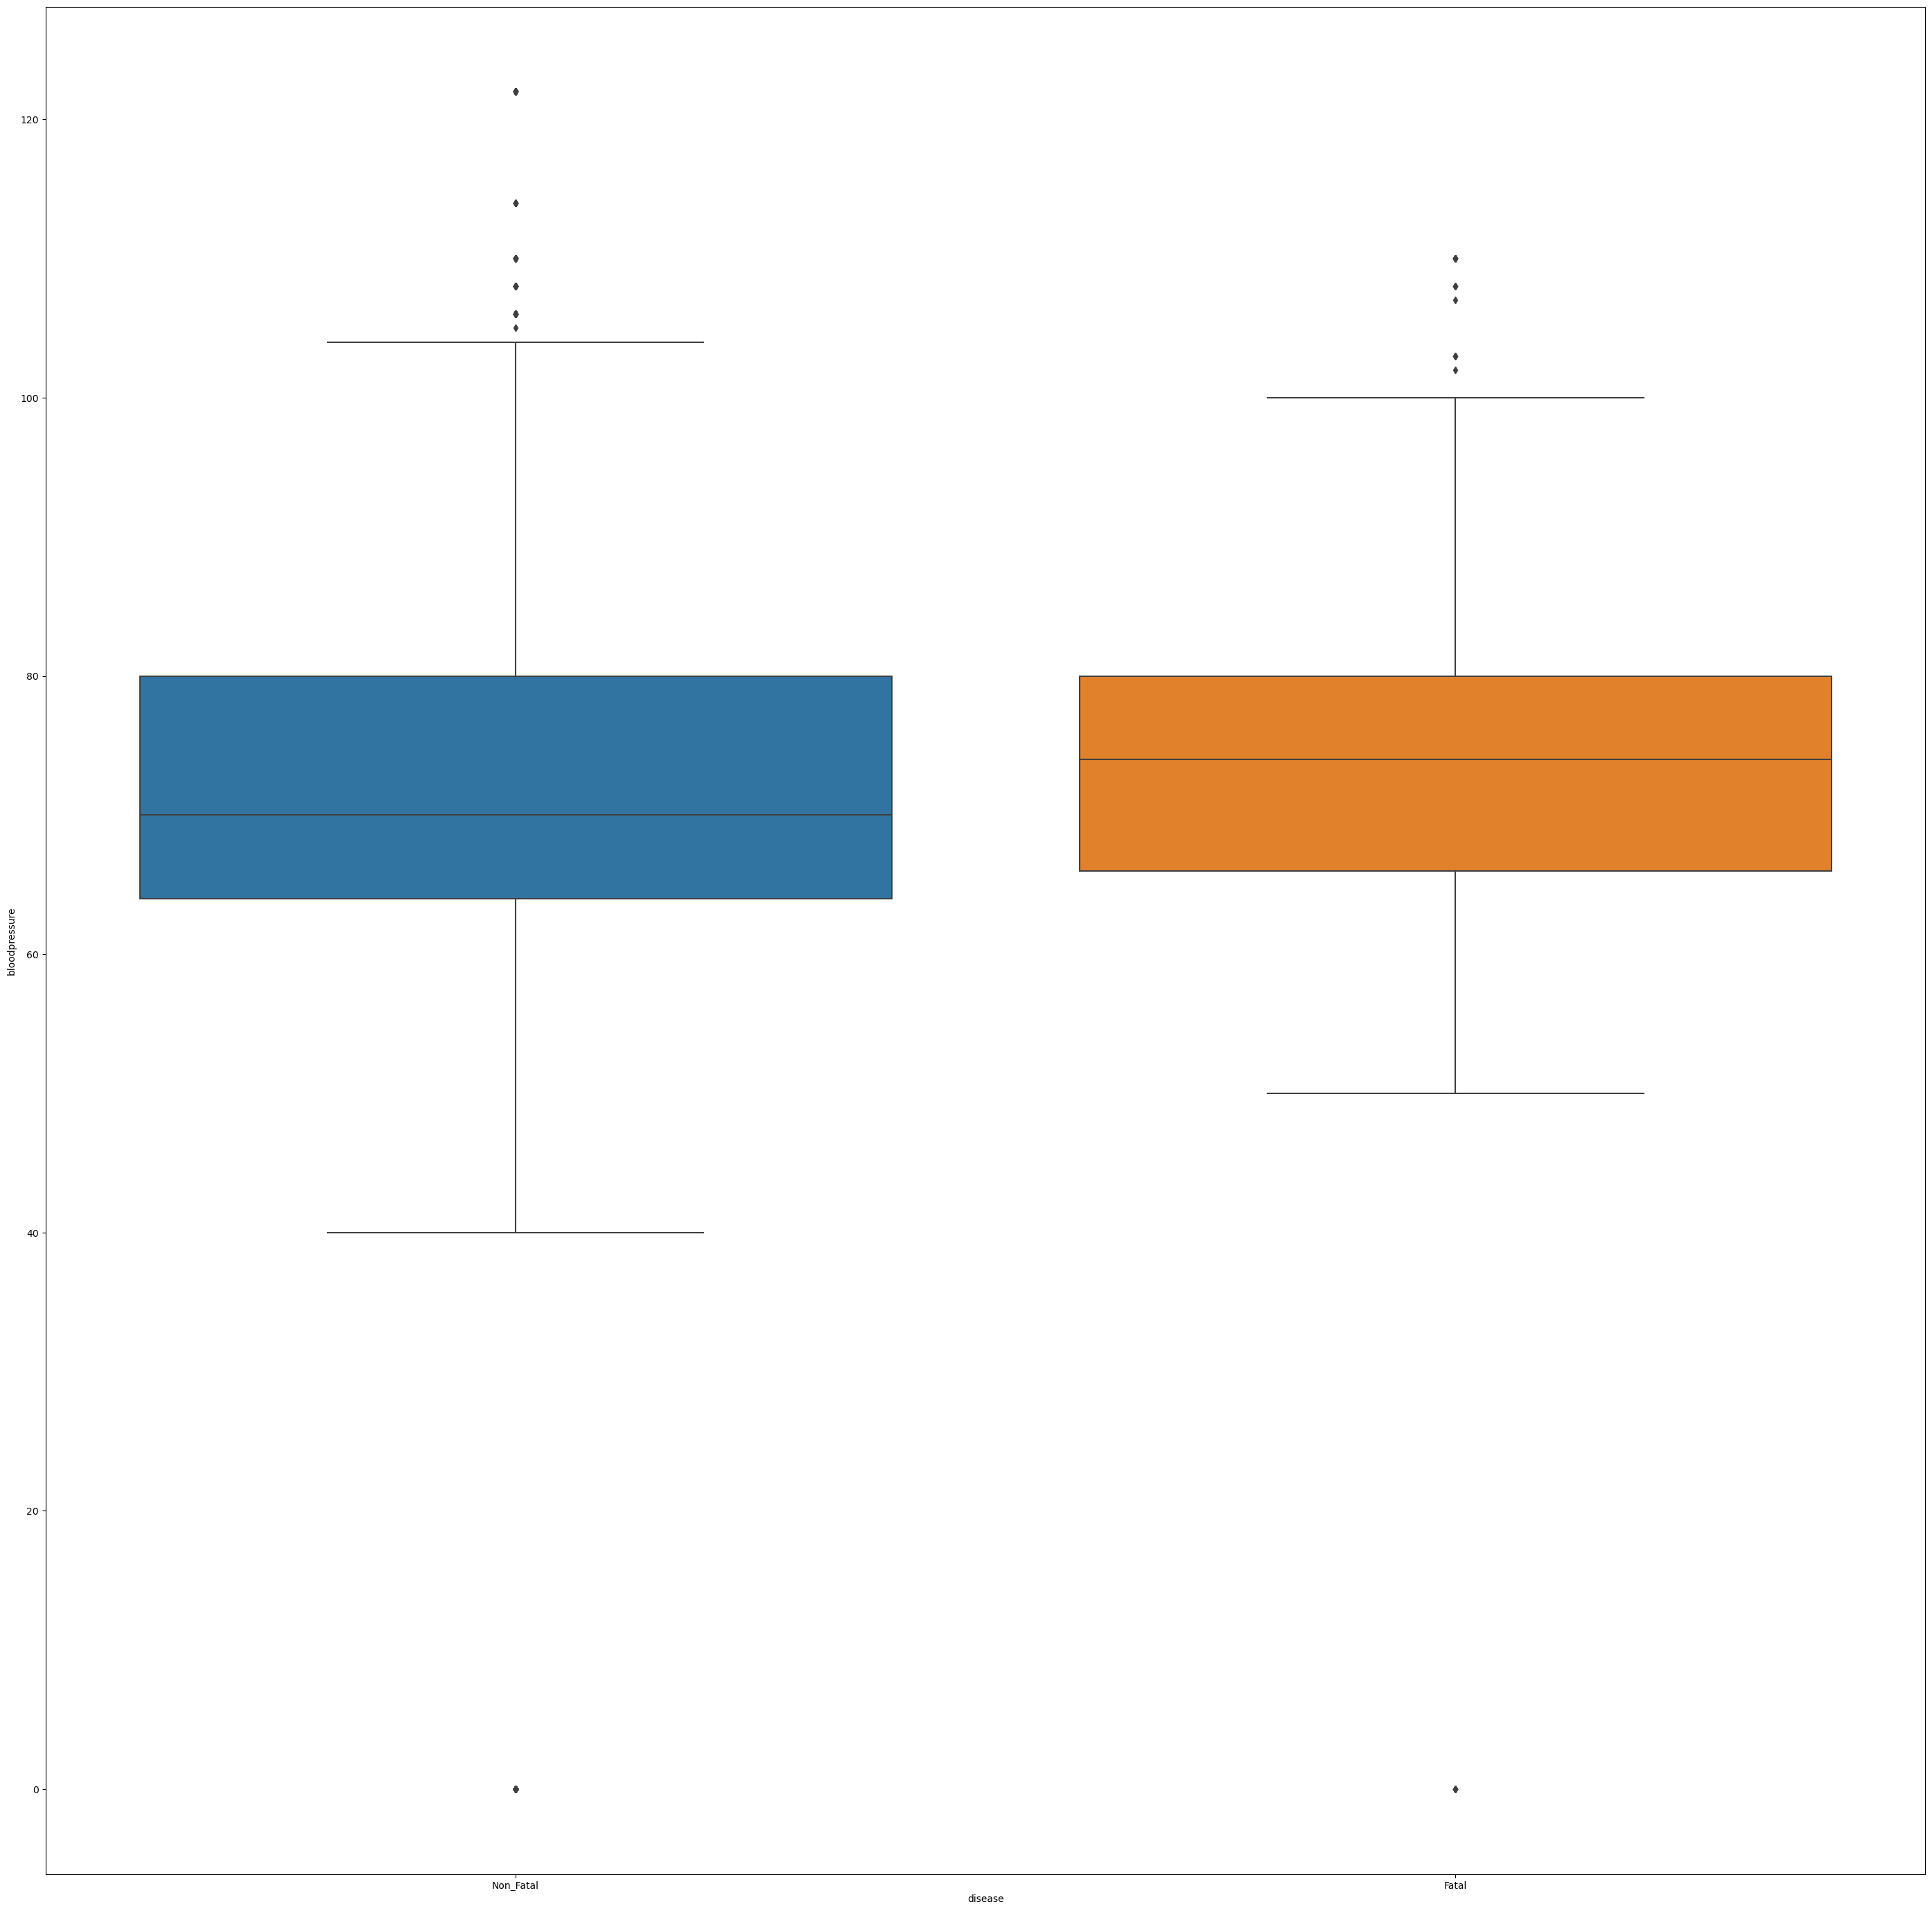

In [135]:
sns.boxplot(x = "disease", y = "bloodpressure", data = health)

In [136]:
health.loc[health.bloodpressure==0, "bloodpressure"] = 80


In [137]:
health.isnull().sum()


age                 0
sex                 0
weight              0
bmi                 0
no_of_dependents    0
smoker              0
city                0
bloodpressure       0
diabetes            0
regular_ex          0
job_title           0
claim               0
disease             0
height              0
dtype: int64

In [139]:
X = health.drop("claim", axis = 1)
y = health.claim

xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size = 0.20, 
                                                random_state = 1)

In [140]:
xtrain.isnull().sum().sum()

0

In [141]:
cols = xtrain.select_dtypes(include = np.number).columns
print(cols)

Index(['age', 'weight', 'bmi', 'city', 'bloodpressure', 'height'], dtype='object')


In [142]:
rs = StandardScaler()
for i in cols:
    xtrain.loc[:, i] = rs.fit_transform(pd.DataFrame(xtrain.loc[:, i]))

In [143]:
for i in cols:
    xtest.loc[:, i] = rs.transform(pd.DataFrame(xtest.loc[:, i]))

In [144]:
xtest.head()

,age,sex,weight,bmi,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,disease,height
7576,294.929218,male,374.604384,172.760630,0,0,45694.635747,247.124118,1,0,Politician,Non_Fatal,-0.106788
10509,326.799284,female,358.669351,125.486697,0,0,59522.260864,417.097806,1,1,Manager,Non_Fatal,0.970412
4253,231.189085,female,417.097806,184.977488,2,0,50787.737963,278.994185,1,0,Clerks,Non_Fatal,0.048980
5150,188.695663,male,348.045995,239.156601,3,0,49939.197441,438.344517,1,0,Manager,Non_Fatal,-1.460497
506,93.085463,female,278.994185,148.326912,0,1,47218.821679,491.461295,0,0,Student,Non_Fatal,-0.637700


In [145]:
# pd.get_dummies
x_train = pd.get_dummies(xtrain, drop_first = True)
x_test = pd.get_dummies(xtest, drop_first = True)

In [152]:
# Linear Regression
# Ridge
# Lasso
# Elastic Net
# Note All Models will be compared on R2 and RMSE

from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

# Model
pred_lr = lr.fit(x_train, ytrain).predict(x_test) # predict Linear Regression
pred_ridge = ridge.fit(x_train, ytrain).predict(x_test) # predict Ridge Regression
pred_lasso = lasso.fit(x_train, ytrain).predict(x_test) # predict Lasso Regression
pred_enet = enet.fit(x_train, ytrain).predict(x_test) # predict ENET Regression

# LR Output
r2 = r2_score(ytest, pred_lr)
rmse = np.sqrt(mean_squared_error(ytest, pred_lr))

# Create a DataFrame for Output
cols = ["Model Name", "R_Squared", "RMSE"]
result = pd.DataFrame(columns = cols)

mlrmodel = pd.Series({"Model Name": "Linear Regression",
                     "R_Squared": r2,
                     "RMSE": rmse})

result = result.append(mlrmodel, ignore_index = True)

result

,Model Name,R_Squared,RMSE
0,Linear Regression,-340047.46251,6.917726e+06


In [153]:

# Ridge Output
r2 = r2_score(ytest, pred_ridge)
rmse = np.sqrt(mean_squared_error(ytest, pred_ridge))

mlrmodel = pd.Series({"Model Name": "Ridge",
                     "R_Squared": r2,
                     "RMSE": rmse})

result = result.append(mlrmodel, ignore_index = True)

result

,Model Name,R_Squared,RMSE
0,Linear Regression,-340047.462510,6.917726e+06
1,Ridge,-340987.121037,6.927278e+06


In [154]:
# Lasso Output
r2 = r2_score(ytest, pred_lasso)
rmse = np.sqrt(mean_squared_error(ytest, pred_lasso)) 

,Model Name,R_Squared,RMSE
0,Linear Regression,-340047.462510,6.917726e+06
1,Ridge,-340987.121037,6.927278e+06
2,Lasso,-337221.583266,6.888922e+06


In [163]:
# Enet Output
r2 = r2_score(ytest, pred_enet)
rmse = np.sqrt(mean_squared_error(ytest, pred_enet))

mlrmodel = pd.Series({"Model Name": "ENET",
                     "R_Squared": r2,
                     "RMSE": rmse})

result = result.append(mlrmodel, ignore_index = True)
result

,Model Name,R_Squared,RMSE
0,Linear Regression,-3.400475e+05,6.917726e+06
1,Ridge,-3.409871e+05,6.927278e+06
2,Lasso,-3.372216e+05,6.888922e+06
3,ENET,-1.892171e+06,1.631824e+07
4,ENET,-1.892171e+06,1.631824e+07
5,ENET,-1.892171e+06,1.631824e+07
6,ENET,-1.892171e+06,1.631824e+07
7,ENET,-1.892171e+06,1.631824e+07
8,ENET,-1.892171e+06,1.631824e+07
9,ENET,-1.892171e+06,1.631824e+07


In [162]:
result.sort_values(ascending=True, by = "RMSE")

,Model Name,R_Squared,RMSE
2,Lasso,-3.372216e+05,6.888922e+06
0,Linear Regression,-3.400475e+05,6.917726e+06
1,Ridge,-3.409871e+05,6.927278e+06
3,ENET,-1.892171e+06,1.631824e+07
4,ENET,-1.892171e+06,1.631824e+07
5,ENET,-1.892171e+06,1.631824e+07
6,ENET,-1.892171e+06,1.631824e+07
7,ENET,-1.892171e+06,1.631824e+07
8,ENET,-1.892171e+06,1.631824e+07
9,ENET,-1.892171e+06,1.631824e+07


In [164]:
# Final Model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
pred_rf = rf.fit(x_train, ytrain).predict(x_test)

# Enet Output
r2 = r2_score(ytest, pred_rf)
rmse = np.sqrt(mean_squared_error(ytest, pred_rf))

mlrmodel = pd.Series({"Model Name": "Random Forest",
                     "R_Squared": r2,
                     "RMSE": rmse})

result = result.append(mlrmodel, ignore_index = True)
result.sort_values(ascending=True, by = "RMSE")

,Model Name,R_Squared,RMSE
11,Random Forest,-2.181510e-01,1.309313e+04
2,Lasso,-3.372216e+05,6.888922e+06
0,Linear Regression,-3.400475e+05,6.917726e+06
1,Ridge,-3.409871e+05,6.927278e+06
3,ENET,-1.892171e+06,1.631824e+07
4,ENET,-1.892171e+06,1.631824e+07
5,ENET,-1.892171e+06,1.631824e+07
6,ENET,-1.892171e+06,1.631824e+07
7,ENET,-1.892171e+06,1.631824e+07
8,ENET,-1.892171e+06,1.631824e+07


In [166]:
# Cross Validation
X = pd.get_dummies(X, drop_first=True)
kfold = KFold(n_splits=3, shuffle=True, random_state=1)

pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    xtest = X.loc[test_index]
    ytest = y.loc[test_index]
    #print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
    pred.append(rf.fit(xtrain, ytrain).predict(xtest))
    
finalpred = pd.DataFrame(pred).T.median(axis = 1)

In [168]:
r2 = r2_score(ytest, finalpred)
rmse = np.sqrt(mean_squared_error(ytest, finalpred))

mlrmodel = pd.Series({"Model Name": "Random Forest_5CV",
                     "R_Squared": r2,
                     "RMSE": rmse})

result = result.append(mlrmodel, ignore_index = True)
result.sort_values(ascending=True, by = "RMSE")

,Model Name,R_Squared,RMSE
12,Random Forest_5CV,1.312136e-01,1.151826e+04
13,Random Forest_5CV,1.312136e-01,1.151826e+04
11,Random Forest,-2.181510e-01,1.309313e+04
2,Lasso,-3.372216e+05,6.888922e+06
0,Linear Regression,-3.400475e+05,6.917726e+06
1,Ridge,-3.409871e+05,6.927278e+06
3,ENET,-1.892171e+06,1.631824e+07
4,ENET,-1.892171e+06,1.631824e+07
5,ENET,-1.892171e+06,1.631824e+07
6,ENET,-1.892171e+06,1.631824e+07


In [169]:
# Stochastic Gradient Descend

sgd = SGDRegressor()
kfold = KFold(n_splits=3, shuffle=True, random_state=1)

pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    xtest = X.loc[test_index]
    ytest = y.loc[test_index]
    #print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
    pred.append(sgd.fit(xtrain, ytrain).predict(xtest))
    
finalpred = pd.DataFrame(pred).T.median(axis = 1)

r2 = r2_score(ytest, finalpred)
rmse = np.sqrt(mean_squared_error(ytest, finalpred))

mlrmodel = pd.Series({"Model Name": "SGD Regressor",
                     "R_Squared": r2,
                     "RMSE": rmse})

result = result.append(mlrmodel, ignore_index = True)
result.sort_values(ascending=True, by = "RMSE")

,Model Name,R_Squared,RMSE
12,Random Forest_5CV,1.312136e-01,1.151826e+04
13,Random Forest_5CV,1.312136e-01,1.151826e+04
11,Random Forest,-2.181510e-01,1.309313e+04
2,Lasso,-3.372216e+05,6.888922e+06
0,Linear Regression,-3.400475e+05,6.917726e+06
1,Ridge,-3.409871e+05,6.927278e+06
3,ENET,-1.892171e+06,1.631824e+07
4,ENET,-1.892171e+06,1.631824e+07
5,ENET,-1.892171e+06,1.631824e+07
6,ENET,-1.892171e+06,1.631824e+07
